### Explanation of Ford GoBike System Data

I chose the Bay Wheels bicycle sharing service. This service is provided to supporting bicycling as an alternative transportation option. There is a lot of information within this dataset that I haven't expected to find. There are in total fourteen columns, and all issues were resolved. All findings will be titled as 'Findings #'. 



All the following imports are needed for running the code.

In [1]:
# all needed libraries imported here 
import pandas as pd
import numpy as np 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:

df_clean = pd.read_csv('master_fordgobike_tripdata.csv')

In [3]:
base_color = sb.color_palette()[0]

### Finding 1: Counting people Who Share Their Trips

In the following plot, we can see that ninety percent of the users don't share their trips. I tried to explore more, but there are no information regarding that matter. I need more information to fully understand the reason behind that, but with the information I currently have, I assume that this particular feature, sharing trips, is either not easily accessible to users or is simply unattractive to them. This is one area that shouldn't be taken lightly because sharing trips is like free advertising, and it will surely result in more people joining.

***TODO: fill it***

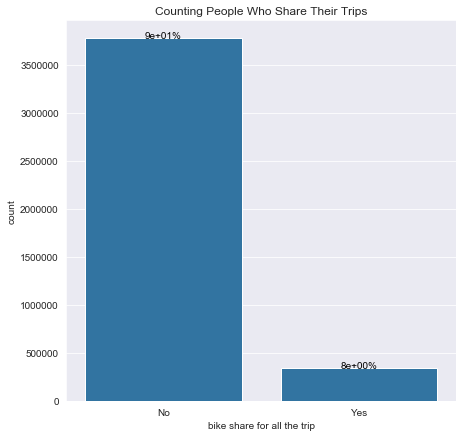

In [20]:
plt.figure(figsize=(7,7))
sb.countplot(data = df_clean, x='bike_share_for_all_trip', color = base_color)
plt.xlabel('bike share for all the trip')
plt.title('Counting People Who Share Their Trips')
n_points = df_clean.shape[0]
bike_share_counts = df_clean['bike_share_for_all_trip'].value_counts()
sb.set_style('darkgrid')
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')



### Finding 2: User Count

We can see in the following plot that only twenty percent of the users are customers and the rest are subscribers. This is relavent because that might imply that the service is not very handy or attractive; thus, I think that it would be a good idea to shed some light on that area to attract more customers that might become future subscribers if they find the service attractive enough. 

***TODO: fill it***

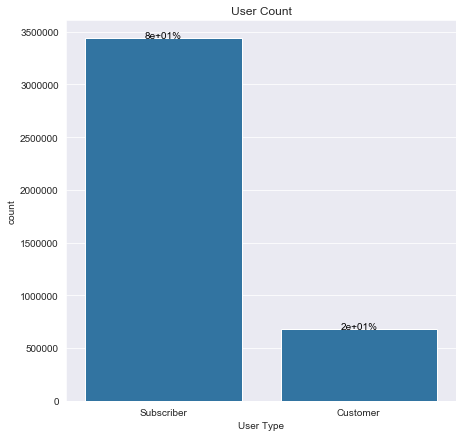

In [19]:
plt.figure(figsize=(7,7))
sb.countplot(data = df_clean, x='user_type', color = base_color )
plt.xlabel('User Type')
plt.title('User Count')
n_points = df_clean.shape[0]
bike_share_counts = df_clean['user_type'].value_counts()
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')

### Finding 3: Count of Users Who hare Their Trips 

I was able to discover that none of the customers throughout 2018 and 2019 were able to share their trips, and very few subscribers did. This is interesting because this not only supports my previous assumptions, it also helped me formulate a new possible one. It is also possible that customers are not able to because they might not have this functionality. As I previously said, this functionality will surely boost the possibility of having more subscribers in the future. 


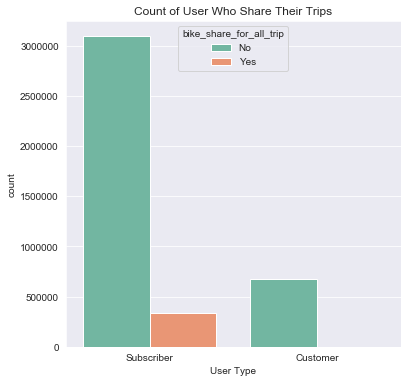

In [18]:
plt.figure(figsize=(6,6))
sb.countplot(data = df_clean, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Set2')
plt.title('Count of Users Who Share Their Trips')
plt.xlabel('User Type');

### Finding 4:



***TODO: fill it***

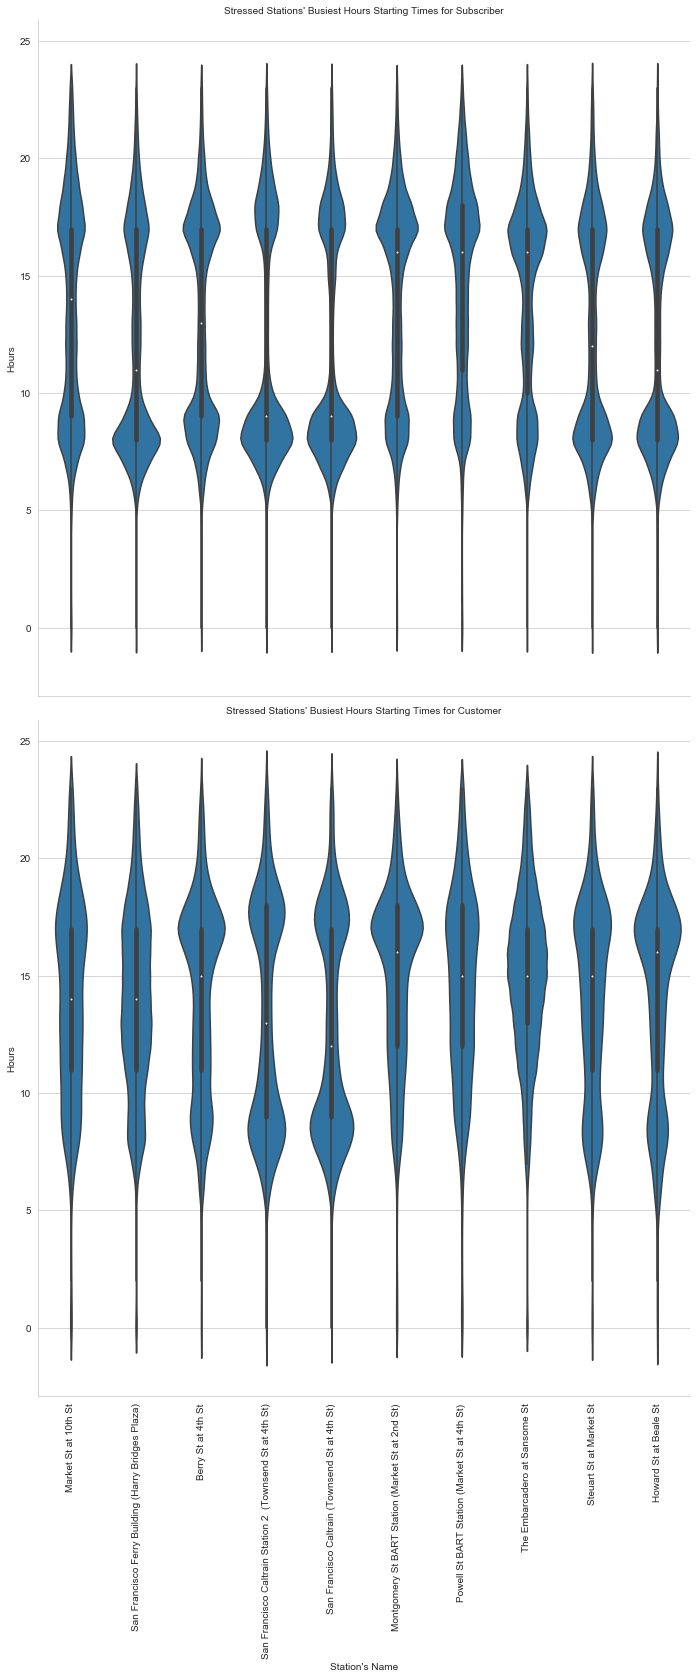

In [45]:
sb.set_style('whitegrid')
ordered_values = ordered_values = df_clean['start_station_name'].value_counts().sort_values(ascending =False)[:10].index
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 10, col_wrap = 1, margin_titles = True)
g.map(sb.violinplot, 'start_station_name',  'start_hour', order = ordered_values)
g.set_titles('Stressed Stations\' Busiest Hours Starting Times for {col_name}')
g.set_axis_labels('Station\'s Name', 'Hours')
plt.xticks(rotation = 90)


***TODO: fill it***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

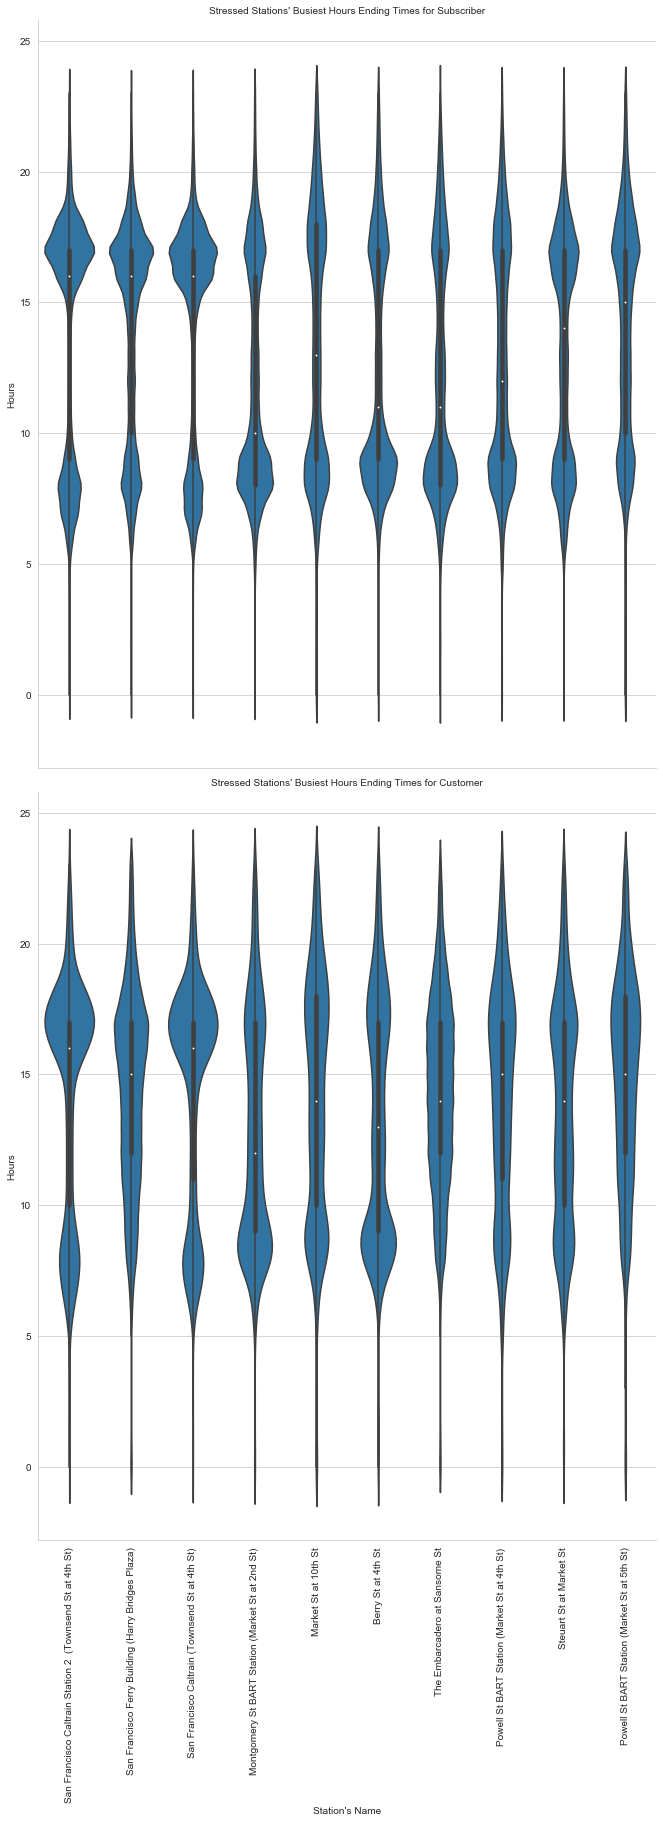

In [46]:
ordered_values = ordered_values = df_clean['end_station_name'].value_counts().sort_values(ascending =False)[:10].index
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 11, col_wrap = 1, margin_titles = True)
g.map(sb.violinplot, 'end_station_name',  'end_hour', order = ordered_values)
g.set_titles('Stressed Stations\' Busiest Hours Ending Times for {col_name}')
g.set_axis_labels('Station\'s Name', 'Hours')
plt.xticks(rotation = 90)

***TODO: fill it***

Text(0, 0.5, 'Count')

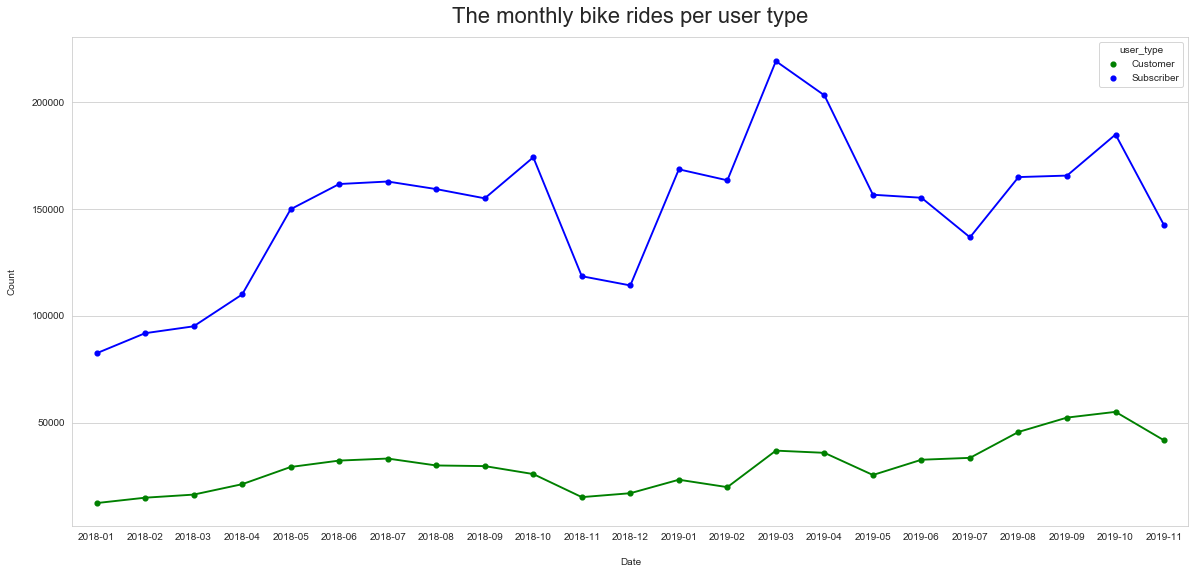

In [29]:
df_date_user = df_clean.groupby(["month_year", "user_type"]).size().reset_index()
plt.figure(figsize=(20,9))
palette = {'Subscriber':'blue', 'Customer':'green'}
sb.pointplot(x='month_year', y=0, hue='user_type', palette=palette, scale=.7, data=df_date_user)
plt.title('The monthly bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)